In [36]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class space():
    def __init__(self, dim_x: int, dim_y: int):
        self.dim_x, self.dim_y = dim_x, dim_y
        self.x, self.y = np.arange(dim_x), np.arange(dim_y)
        self.X, self.Y = np.meshgrid(self.x, self.y)
        self.potential = np.zeros((self.X.shape))
    
    def setGoal(self, x: int, y: int):
        self.xg, self.yg = x, y
        
    def invDistance(self, x: int, y: int):
        if self.potential[x][y] == 1:
            return -1
        if (x == self.xg) and (y == self.yg):
            return 2
        else:
            inv_d = 1/math.sqrt(math.pow((x-self.xg), 2) + math.pow((y-self.yg), 2))
            return inv_d

    # r² = (x - xo)² + (y-y0)² 
    def setCircularObjectPotential(self, x0: int, y0: int, r: float, p: float):
        for i, linha in enumerate(self.potential): 
            for j, value in enumerate(linha): 
                if ( math.pow((i-x0),2) + math.pow((j-y0),2)) <= r:
                    self.potential[i][j] = p
                    

    def findGoalWay(self, i_max: int, x0: int, y0: int, step: int=1): 
        x, y = [x0], [y0]
#       lt    t     rt 
#       l           r         
#       lb    b     rb
# 
#       [top, right-top, right, right-bottom, bottom, left-bottom, left, left-top]  
        dtype = [('x', int), ('y', int), ('inv-distance', float)]
        movements = np.zeros(8, dtype= dtype)
        for i in range(i_max): 
#             print(x)
#             print(y)
            if x[-1] == self.xg and y[-1] == self.yg:
                break
            
#           rigth  
            if x[-1]+ step < self.dim_x:
                movements[2][0] = x[-1] + step
                movements[2][1] = y[-1]
                movements[2][2] = self.invDistance(x=x[-1]+ step, y=y[-1])
                
#           left      
            if x[-1] > 0: 
                movements[6][0] = x[-1] - 1
                movements[6][1] = y[-1]
                movements[6][2] = self.invDistance(x=x[-1]-1, y=y[-1])
#           top      
            if y[-1] + step < self.dim_y: 
                movements[0][0] = x[-1]
                movements[0][1] = y[-1]+ step
                movements[0][2] = self.invDistance(x=x[-1], y=y[-1]+ step)
#           bottom      
            if y[-1] > 0: 
                movements[4][0] = x[-1]
                movements[4][1] = y[-1]-1
                movements[4][2] = self.invDistance(x=x[-1], y=y[-1]-1)
#           rigth-top
            if (x[-1] + step < self.dim_x) and (y[-1] + step < self.dim_y):
                movements[1][0] = x[-1] + step
                movements[1][1] = y[-1] + step
                movements[1][2] = self.invDistance(x=x[-1]+ step, y=y[-1]+ step)
#           rigth-bottom
            if (x[-1] + step < self.dim_x) and (y[-1] > 0):
                movements[3][0] = x[-1] + step
                movements[3][1] = y[-1] - 1
                movements[3][2] = self.invDistance(x=x[-1]+ step, y=y[-1]-1)                
#           left-top      
            if (x[-1] > 0) and (y[-1] + step < self.dim_y): 
                movements[7][0] = x[-1] - 1
                movements[7][1] = y[-1] + step
                movements[7][2] = self.invDistance(x=x[-1]-1, y=y[-1]+ step)
#           left-bottom     
            if (x[-1] > 0) and (y[-1] > 0): 
                movements[5][0] = x[-1] - 1
                movements[5][1] = y[-1] - 1
                movements[5][2] = self.invDistance(x=x[-1]-1, y=y[-1]-1)
            
#             print(movements)
            bm = np.sort(movements, order='inv-distance')[-1]
            x += [bm[0]]
            y += [bm[1]]
            
        print("iterations: ", i)
        
        return [x, y]



In [37]:
# Demonstration
tab = space(700, 700)

# # goal
xg, yg = 600, 0
tab.setCircularObjectPotential(x0=xg, y0=yg, r=100, p=-1)
tab.setGoal(x=xg, y=yg)


# # objects
tab.setCircularObjectPotential(x0=300, y0=200, r=200, p=1)
tab.setCircularObjectPotential(x0=200, y0=200, r=200, p=1)
tab.setCircularObjectPotential(x0=100, y0=100, r=200, p=1)
tab.setCircularObjectPotential(x0=400, y0=100, r=200, p=1)
tab.setCircularObjectPotential(x0=300, y0=400, r=200, p=1)
tab.setCircularObjectPotential(x0=300, y0=300, r=200, p=1)
tab.setCircularObjectPotential(x0=400, y0=400, r=200, p=1)


# print(tab.potential)
x, y = tab.findGoalWay(i_max=1000, x0=0, y0=0, step=1)
print("Goal finded in: x=" + str(x[-1]) + " y=" + str(y[-1]))


iterations:  600
Goal finded in: x=600 y=0


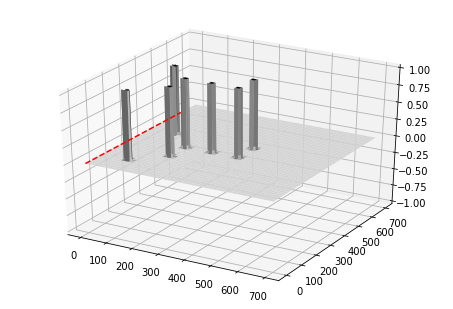

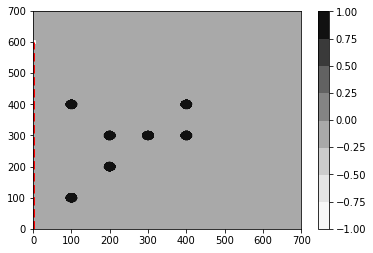

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# cm = plt.cm.YlOrRd
cm = plt.cm.Greys

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tab.X, tab.Y, tab.potential, cmap=cm, alpha=1)
ax.plot(y, x, 0, 'r--')


fig = plt.figure()
plt.contourf(tab.X, tab.Y, tab.potential, cmap=cm)
plt.plot(y, x, 'r--', linewidth=3)
plt.colorbar()

plt.show()
